<a href="https://colab.research.google.com/github/sshee0123/Airpotal_crawling/blob/main/DeepLearning/deep02_SimpleDeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Torch Configuration

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Hyper-parameters

In [1]:
input_size = 1 # 1차원
output_size = 1 # 1차원
num_epochs = 100
learning_rate = 0.001

### Toy Dataset

In [4]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

### Linear regression model

In [5]:
model = nn.Linear(input_size, output_size)

### Loss and Optimizer

In [6]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Train the model

In [8]:
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train) # from_numpy() : numpy 를 tensor로
  targets = torch.from_numpy(y_train)

  # Forward 진행 방향, 입력값 -> 예측값 출력 -> loss
  preds = model(inputs)
  loss = loss_func(preds, targets) # loss : model의 loss

  # Backward 진행 방향
  optimizer.zero_grad() # optimizer 초기화 (해야함)
  loss.backward()
  optimizer.step() # 이때 비로소 학습이 진행된다..

  if(epoch+1) % 5 == 0:
    print("Epoch[{}/{}], Loss:{:.4f}".format(epoch+1, num_epochs, loss.item()))


Epoch[5/100], Loss:0.4568
Epoch[10/100], Loss:0.3303
Epoch[15/100], Loss:0.2789
Epoch[20/100], Loss:0.2580
Epoch[25/100], Loss:0.2494
Epoch[30/100], Loss:0.2458
Epoch[35/100], Loss:0.2442
Epoch[40/100], Loss:0.2435
Epoch[45/100], Loss:0.2431
Epoch[50/100], Loss:0.2428
Epoch[55/100], Loss:0.2425
Epoch[60/100], Loss:0.2423
Epoch[65/100], Loss:0.2422
Epoch[70/100], Loss:0.2420
Epoch[75/100], Loss:0.2418
Epoch[80/100], Loss:0.2416
Epoch[85/100], Loss:0.2414
Epoch[90/100], Loss:0.2412
Epoch[95/100], Loss:0.2410
Epoch[100/100], Loss:0.2408


### Plot the graph

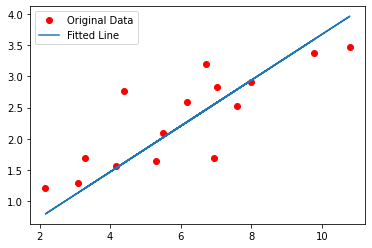

In [11]:
#detach 연산기록으로부터 분리시켜야 한다.
predicted = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train, "ro", label = "Original Data")
plt.plot(x_train, predicted, label = "Fitted Line")
plt.legend()
plt.show()

In [12]:
torch.save(model.state_dict(), 'model.ckpt')